## Практическое занятие 6
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [4]:
import numpy as np
import sympy
import math
from sympy import nsolve
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

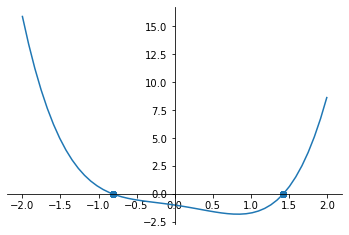

In [5]:
from sympy.abc import x

def f(x):
    return x**4 - sympy.E**x

X = np.linspace(-2, 2)
ax = plt.gca()
ax.plot(X, f(X))
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

roots = [nsolve(f(x), interval) for interval in X]
y_coords = [f(x) for x in roots]
ax.scatter(roots, y_coords)

### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

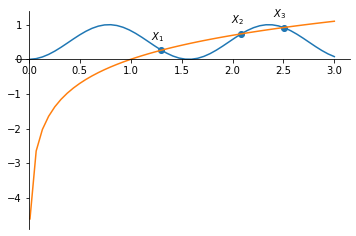

In [6]:
def f(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.sin(2*x)**2
    if lib == 'numpy':
        return np.sin(2*x)**2
    return 'error'

def g(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.log(x)
    if lib == 'numpy':
        return np.log(x)
    return 'error'

X = np.linspace(0.01, 3)
plt.plot(X, f(X, 'numpy'))
plt.plot(X, g(X, 'numpy'))
ax = plt.gca()

ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

roots = [nsolve(f(x) - g(x), x, x0) for x0 in [1.3, 2, 2.5]]
y_coords = []
for i in roots:
    y_coords.append(g(i))
    
ax.scatter(roots, y_coords)
for i, x_coords in enumerate(roots):
    ax.annotate(r'$X_' + str(i + 1) + '$', 
    xy=(x_coords, y_coords[i]),
    xycoords='data',
    xytext=(x_coords - 0.1, y_coords[i] + 0.3), textcoords='data')

### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.

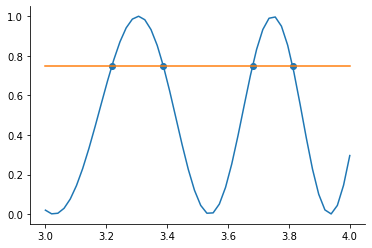

In [7]:
def f(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.sin(2*x**2 - 7*x + 6)**2
    if lib == 'numpy':
        return np.sin(2*x**2 - 7*x + 6)**2
    return 'error'

def g(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.S(3)/4 + x*0
    if lib == 'numpy':
        return 0.75 + x*0
    return 'error'

ax = plt.gca()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

X = np.linspace(3, 4)
ax.plot(X, f(X, lib="numpy"))
ax.plot(X, g(X, lib="numpy"))

roots = [nsolve(f(x) - g(x), x, 3),
        nsolve(f(x) - g(x), x, 3.1),
        nsolve(f(x) - g(x), x, 3.5),
        nsolve(f(x) - g(x), x, 3.7)]

y_coords = []
for i in roots:
    y_coords.append(f(i))
    
ax.scatter(roots, y_coords)

### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [9]:
def f(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.tan(2*x**2 + 1)**4 - 10
    if lib == 'numpy':
        return np.tan(2*x**2 + 1)**4 - 10
    return 'error'

roots = [sympy.nsolve(sympy.Eq(f(x), 0), x, [0, 0.2], solver="bisect", verify=False)]

for i in roots:
    print(i)

0.171066377483446


### Задача 5.
Решить систему уравнений 
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [23]:
y, z = sympy.symbols('y z')
def f(x, y, z):
    return (x - 1)**2 + (y - 2)**2 + (z + 3)**2
def g(x, y, z):
    return x + y + z
def h(x, y, z):
    return -2*x + 3*y - z

roots = sympy.nsolve((sympy.Eq(f(x, y, z), 25), sympy.Eq(g(x, y, z), 0), sympy.Eq(h(x, y, z), 7)), (x, y, z), (0, 0, 0))

for item in roots:
    print(item)
    
x0, y0, z0 = roots

print()
print(f(x0, y0, z0) == 25)
print()
print(g(x0, y0, z0) == 0)
print(g(x0, y0, z0))
print()
print(h(x0, y0, z0) == 7)

-2.08606699924184
1.22848325018954
0.857583749052298

True

False
-2.22044604925031e-16

True


### Индивидуальное задание
Построить графики функций $f(x)$ и $g(x)$, уточнить координаты точек пересечения, решая численно соответствующее уравнение. На  графике отметить и подписать буквами $А_1$, $A_2$, ... точки пересечения графиков.

\begin{align*}
 f(x) = - \frac{x^{2}}{8} + \frac{5 x}{4} + 10\\
 g(x) = \frac{\left(x + 2\right) \left(13 x + 40\right)}{8}
\end{align*}

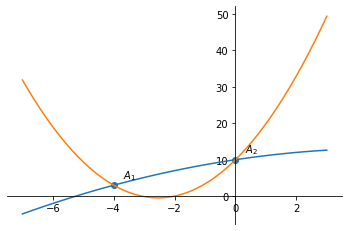

In [36]:
def f(x, lib='sympy'):
    if lib == 'sympy':
        return -((x**2)/8) + (5*x)/4 + 10
    if lib == 'numpy':
        return -((x**2)/8) + (5*x)/4 + 10
    return 'error!'

def g(x, lib='sympy'):
    if lib == 'sympy':
        return ((x + 2)*(13*x + 40))/8
    if lib == 'numpy':
        return ((x + 2)*(13*x + 40))/8
    return 'error!'

X = np.linspace(-7, 3)
plt.plot(X, f(X, 'numpy'))
plt.plot(X, g(X, 'numpy'))
ax = plt.gca()
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
ax.spines['left'].set_position(('data', 0)) 
ax.spines['bottom'].set_position(('data', 0))

roots = [sympy.nsolve(f(x) - g(x), x, x0) for x0 in [-5, 0]]
y_coord = []
for item in roots:
    y_coord.append(f(item))

ax.scatter(roots, y_coord)
for i, x_coord in enumerate(roots):
    ax.annotate(r'$A_' + str(i + 1) +'$',
    xy=(x_coord, y_coord[i]), xycoords='data', xytext=(x_coord + 0.3, y_coord[i] + 2), textcoords='data' )